## Democracy
### Polity5

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

This is a time series dataset. During the years on which a given country has been in a specific situation: Interregnum, Transition, or Interruption, the dataset presents a value of -77, -88, or -66.

In [2]:
polity_df = pd.read_csv('../datasets/processed/democracy/polity/polity5.csv', header=0)
print(f"Records: {len(polity_df)}")

# Remove the cases where democ is -77, -88, or -66
polity_df = polity_df[polity_df['democ'] != -77]
polity_df = polity_df[polity_df['democ'] != -88]
polity_df = polity_df[polity_df['democ'] != -66]

print(f"Records without special cases: {len(polity_df)}")

polity_df.describe()


Records: 9845
Records without special cases: 9414


,Year,autoc,democ,durable,exconst,exrec,parcomp,parreg,polcomp,polity,polity2,xconst,xrcomp,xropen,xrreg
count,9414.000000,9414.000000,9414.000000,9372.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000
mean,1985.768324,3.278415,4.301360,22.699851,4.219567,5.564372,2.820268,3.523688,5.510835,1.022945,1.022732,4.219354,1.783833,3.244317,2.390376
std,20.889814,3.535215,4.142783,27.291290,2.338395,2.421804,1.571819,1.099830,3.600736,7.443723,7.443667,2.338370,1.100935,1.463246,0.640564
min,1941.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-10.000000,-10.000000,1.000000,0.000000,0.000000,1.000000
25%,1969.000000,0.000000,0.000000,4.000000,2.000000,3.000000,1.000000,3.000000,1.000000,-7.000000,-7.000000,2.000000,1.000000,4.000000,2.000000
50%,1988.000000,1.000000,4.000000,13.000000,4.000000,7.000000,3.000000,4.000000,6.000000,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000
75%,2004.000000,7.000000,9.000000,29.000000,7.000000,8.000000,4.000000,4.000000,9.000000,8.000000,8.000000,7.000000,3.000000,4.000000,3.000000
max,2018.000000,10.000000,10.000000,170.000000,7.000000,8.000000,5.000000,5.000000,10.000000,10.000000,10.000000,7.000000,3.000000,4.000000,3.000000


Here I verify that, taking out the special cases, the dataset columns have values according to the reference documentation.

Now I'll take the polity and polity2 indexes as well as the country and year to do PCA and evaluate the importance of the predictors to understand the difference between the countries.

The "durable" predictor is based on the number of years without a regime change and this unrestricted value could generate noise in the PCA. Apart from this, this predictor in the dataset has a lot of missing values.

In [3]:
# Remove the predictors country, year, polity, polity2
# Remove autoc and democ as their are composite indexes
# Also remove exconst as I already verified that contains the same values as xconst
predictors = ['exrec', 'parcomp', 'parreg', 'polcomp', 'xconst', 'xrcomp', 'xropen', 'xrreg']
polity_df_components = polity_df[predictors]
polity_df_components.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 0 to 9844
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   exrec    9414 non-null   int64
 1   parcomp  9414 non-null   int64
 2   parreg   9414 non-null   int64
 3   polcomp  9414 non-null   int64
 4   xconst   9414 non-null   int64
 5   xrcomp   9414 non-null   int64
 6   xropen   9414 non-null   int64
 7   xrreg    9414 non-null   int64
dtypes: int64(8)
memory usage: 661.9 KB


Text(0, 0.5, 'PC2')

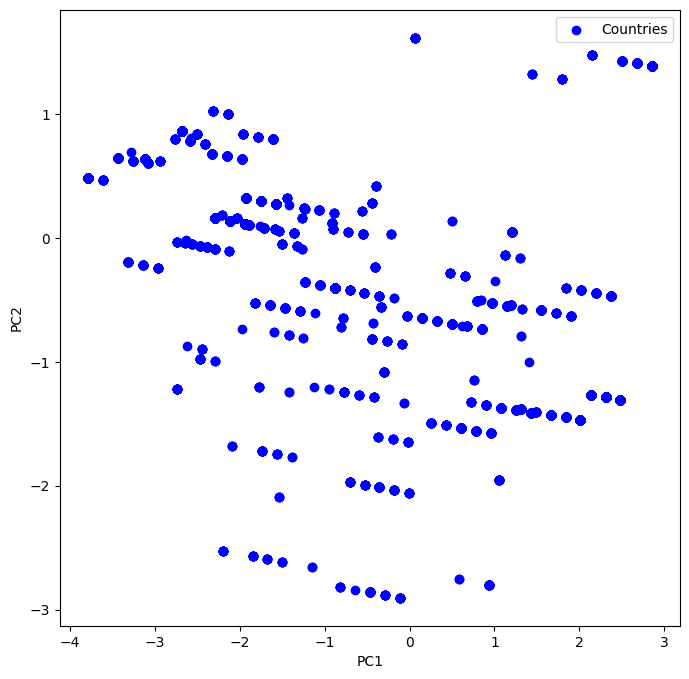

In [4]:
scaler = StandardScaler()
polity_df_scaled = scaler.fit_transform(polity_df_components)
polity_df_scaled = pd.DataFrame(
    polity_df_scaled,
    index=polity_df_components.index,
    columns=polity_df_components.columns
)
polity_df_scaled.describe()

pca = PCA()
pca.fit(polity_df_scaled)
scores = pca.transform(polity_df_scaled)
scores.shape

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='blue', label='Countries')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Plotting the PCA with only two components demonstrated high variance.

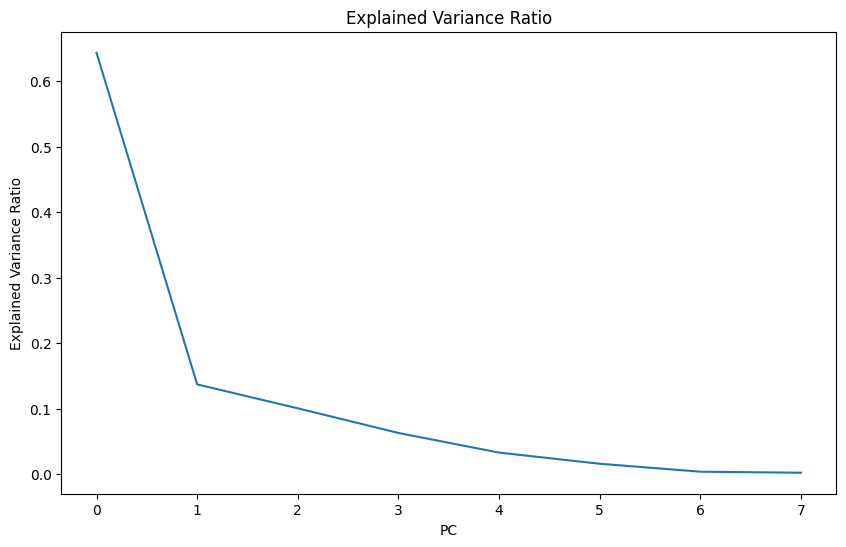

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()

The first principal component explains 60% of the variance. I'll analyze the loadings of the first principal component to understand which predictors are more important to understand the difference between the countries.

In [6]:
# Print the loadings of the first principal component associated with the predictors
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[0]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
  Predictor   Loading
5    xrcomp  0.423158
4    xconst  0.411867
3   polcomp  0.408430
0     exrec  0.389307
1   parcomp  0.384546
7     xrreg  0.326321
6    xropen  0.280280
2    parreg  0.003118


I'll do the same analysis but only taking a snapshot of the dataset for the year with most complete data.

Now I'll select a year from the Time Series

In [7]:
# Show the number of records for each year and order in descending order
polity_df['Year'].value_counts().sort_values(ascending=False)

Year
2018    161
2017    161
2016    160
2008    160
2009    160
       ... 
1945     54
1944     52
1942     51
1943     50
1941     49
Name: count, Length: 78, dtype: int64

I'll select the year 2018 as the latest and more complete snapshot of the dataset and calculate the PCA for this year.

Text(0, 0.5, 'PC2')

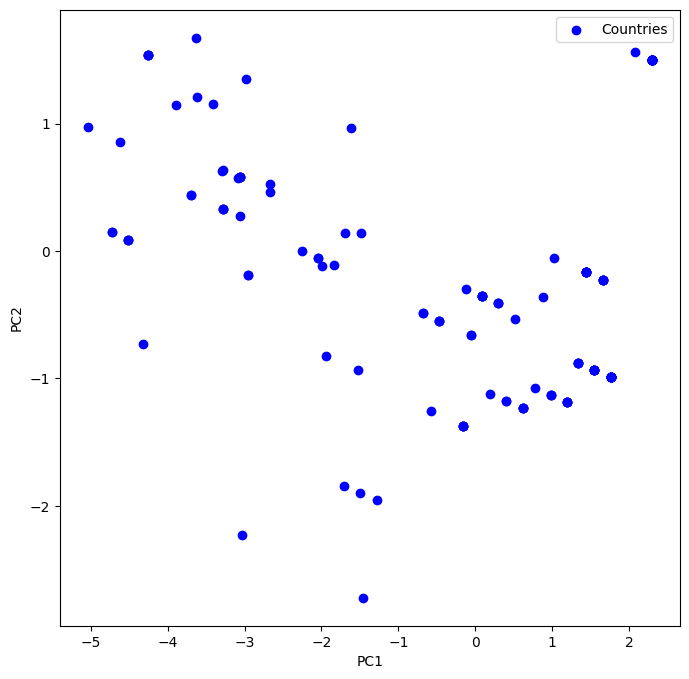

In [8]:
polity_df_snapshot = polity_df[polity_df['Year'] == 2018]
polity_df_snapshot.head()
polity_df_components = polity_df_snapshot[predictors]
scaler = StandardScaler()
polity_df_scaled = scaler.fit_transform(polity_df_components)
polity_df_scaled = pd.DataFrame(
    polity_df_scaled,
    index=polity_df_components.index,
    columns=polity_df_components.columns
)
polity_df_scaled.describe()

pca = PCA()
pca.fit(polity_df_scaled)
scores = pca.transform(polity_df_scaled)
scores.shape

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='blue', label='Countries')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

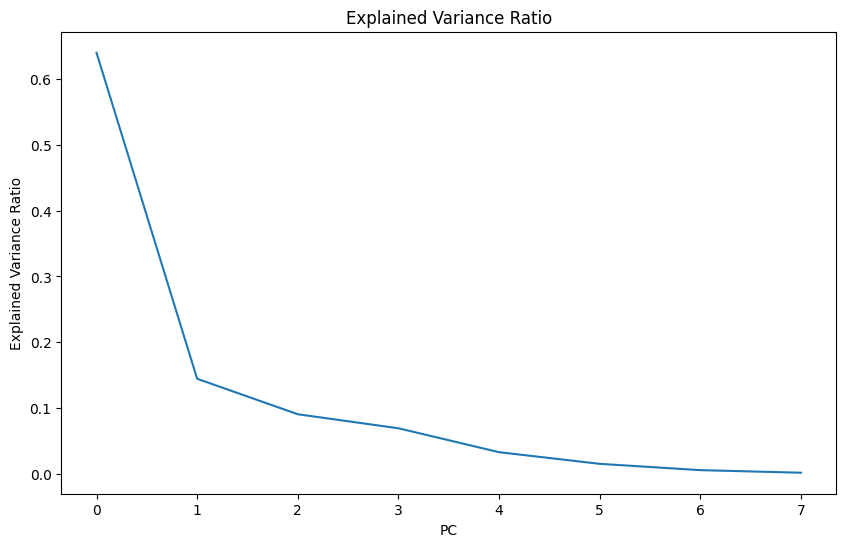

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [10]:
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[0]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
  Predictor   Loading
5    xrcomp  0.421128
4    xconst  0.408067
3   polcomp  0.406987
0     exrec  0.398513
1   parcomp  0.377940
7     xrreg  0.313131
6    xropen  0.298192
2    parreg  0.043284


From this, we understand that almost every predictor (Except for parreg) is important to differentiate the country democracy levels.

If we have to choose four, they are:
- xrcomp: Competitiveness of Executive Recruitment
- xconst: Executive Constraints
- polcomp: Political Competition Concept
- exrec: Executive Recruitment Concept

I'll create a correlation matrix to understand the correlation between the predictors.

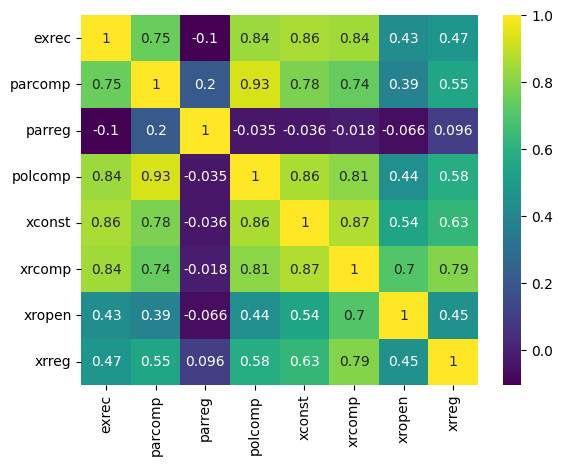

In [11]:
# Use the original dataset with the time series data
polity_df_components = polity_df[predictors]
sns.heatmap(polity_df_components.corr(), cmap="viridis", annot = True)
plt.show()

All the predictors used in the first principal component are highly correlated. From this I understand that countries with better level of democracy usually are better in most of these predictors.

I'll run a correlation matrix for all these predictors and the autoc, democ, polity, and polity2 indexes.



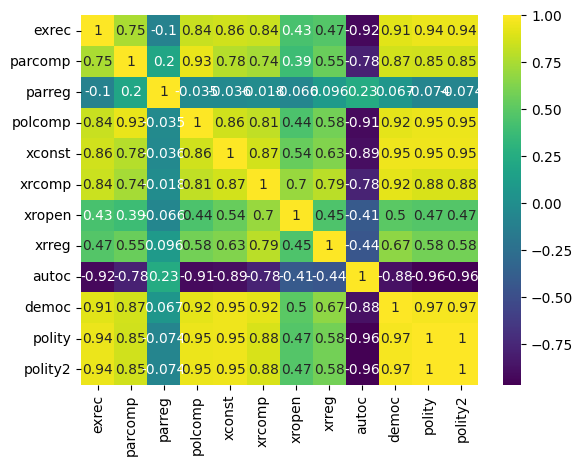

In [12]:
polity_df_components = polity_df[predictors + ['autoc', 'democ', 'polity', 'polity2']]
sns.heatmap(polity_df_components.corr(), cmap="viridis", annot = True)
plt.show()

As expected, parreg is the outlier predictor, xrreg and xropen aren't very important.

This demonstrates that using the polity and polity2 indexes is a good approximation to understand the democracy level of a country.

If we want to correlate this dataset with the ones related to women rights, we won't have much difference if we use other predictors.

I'll take a snapshot of the last year and create a new dataset.

In [13]:
polity_df_snapshot.drop(columns=['Year'], inplace=True)
polity_df_snapshot.to_csv('../datasets/processed/democracy/polity/polity5-snapshot.csv', index=False)

/var/folders/3c/bf3091xd4h9fj5rvqhp6_05r0000gq/T/ipykernel_97560/2953651075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polity_df_snapshot.drop(columns=['Year'], inplace=True)


### Dichotomous Democracy Index

I'll do the same for the dichotomous democracy index.

In [15]:
dichotomous_df = pd.read_csv('../datasets/processed/democracy/dichotomous/dichotomous-democracy.csv', header=0)
print(f"Records: {len(dichotomous_df)}")

print(dichotomous_df.info())

print(dichotomous_df['year'].value_counts().sort_values(ascending=False))



Records: 18295
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18295 entries, 0 to 18294
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   18295 non-null  object 
 1   ccode                     18295 non-null  int64  
 2   abbreviation              18295 non-null  object 
 3   abbreviation_undp         18295 non-null  object 
 4   year                      18295 non-null  int64  
 5   democracy                 18295 non-null  float64
 6   democracy_trans           18295 non-null  int64  
 7   democracy_breakdowns      18295 non-null  int64  
 8   democracy_duration        18295 non-null  int64  
 9   democracy_omitteddata     18295 non-null  int64  
 10  democracy_femalesuffrage  18295 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.5+ MB
None
year
2005    192
2004    192
2003    192
2002    192
2006    192
       ... 
1808     20
1806 

In [16]:
dichotomous_df_snapshot = dichotomous_df[dichotomous_df['year'] == 2005]
dichotomous_df_snapshot.drop(columns=['year'], inplace=True)
dichotomous_df_snapshot.to_csv('../datasets/processed/democracy/dichotomous/dichotomous-democracy-snapshot.csv', index=False)

/var/folders/3c/bf3091xd4h9fj5rvqhp6_05r0000gq/T/ipykernel_97560/2327986746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dichotomous_df_snapshot.drop(columns=['year'], inplace=True)
